In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway,boxcox,yeojohnson,ttest_ind,chi2_contingency
#%matplotlib notebook

In [2]:
data = pd.read_csv('bike_sharing.csv')

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.drop('datetime',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [6]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# NULL Check

In [7]:
data.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Taking data from different population categorized by season
# Main aim is to test wheather the season is impacting on user registration count

In [9]:
one_spring_season = data.loc[data['season']==1]['count']
two_summer_season = data.loc[data['season']==2]['count']
three_fall_season = data.loc[data['season']==3]['count']
four_winter_season = data.loc[data['season']==4]['count']

In [10]:
season_vs_count_data = list(zip(one_spring_season,two_summer_season,three_fall_season,four_winter_season))
season_vs_count_data = pd.DataFrame(season_vs_count_data,columns=['one_spring_season','two_summer_season','three_fall_season','four_winter_season'])
season_vs_count_data

,one_spring_season,two_summer_season,three_fall_season,four_winter_season
0,16,6,68,130
1,40,4,31,58
2,32,7,13,67
3,13,4,11,25
4,1,3,6,8
...,...,...,...,...
2681,549,302,340,340
2682,330,246,233,200
2683,223,153,129,120
2684,148,108,70,54


# Helper Functions to plot details of features

In [11]:
def get_outlier_details(data,title):
    sns.boxplot(data)
    plt.title(title+' outlier analysis')
    plt.show()
    Q1,Q3 = np.percentile(data,[25,75])
    IQR = Q3-Q1
    right = Q3 + (1.5 * IQR)
    left =  Q1 - (1.5 * IQR)
    print('Quratile details')
    return (Q1 , Q3 ,IQR, right, left)



def plot_all_details(data,title):
    data = np.array(np.log(data))
    Q1,Q3,IQR,right_wisker,left_wisker = get_outlier_details(data,title)
    print(f'Q1:{Q1} , Q3:{Q3} , IQR :{IQR} , right_wisker : {right_wisker}  , left_wisker :{left_wisker}')
    sns.histplot(data,kde=True)
    plt.show()
    return data

# Anova Test
  Primary condition for Anova
1. Sample must follow normal distribution.
2. Independent data values.
3. Equal sample varience of data in different group.

# Observation
It is observed that this below distribution is not following normal distribution so we are applying log normal for converting it into normal distribution

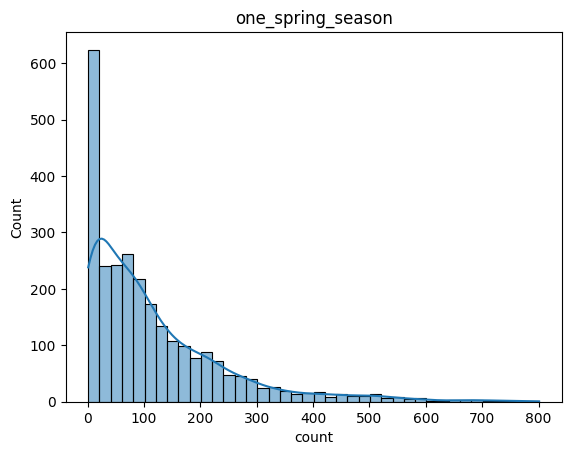

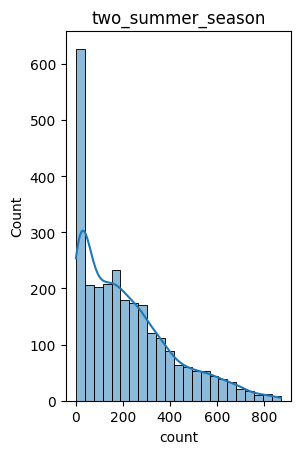

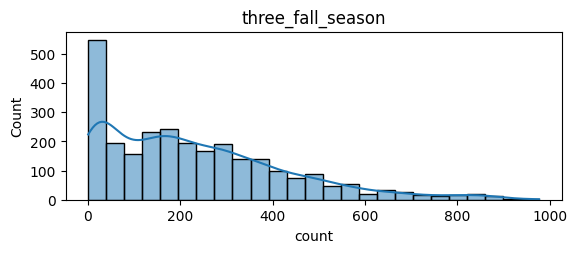

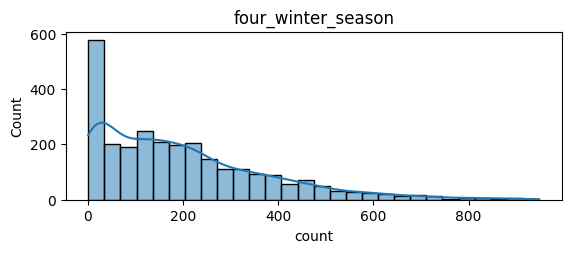

In [12]:
plt.subplot(1,1,1)
plt.title('one_spring_season')
sns.histplot(one_spring_season,kde=True)
plt.show()


plt.subplot(1,2,2)
plt.title('two_summer_season')
sns.histplot(two_summer_season,kde=True)
plt.show()


plt.subplot(2,1,1)
plt.title('three_fall_season')
sns.histplot(three_fall_season,kde=True)
plt.show()


plt.subplot(2,1,2)
plt.title('four_winter_season')
sns.histplot(four_winter_season,kde=True)
plt.show()


# Normal Distribution Check after removing outliers

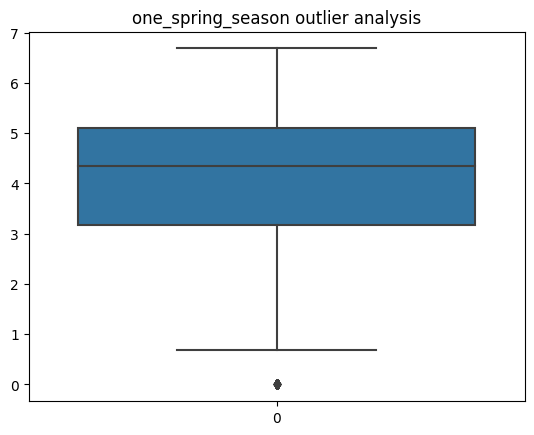

Quratile details
Q1:3.1780538303479458 , Q3:5.099866427824199 , IQR :1.921812597476253 , right_wisker : 7.9825853240385785  , left_wisker :0.29533493413356604


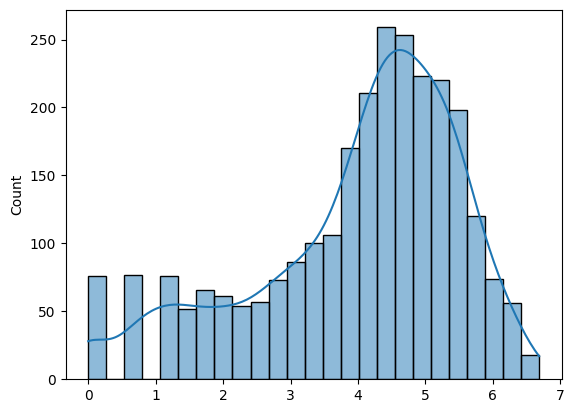

In [13]:
one_spring_season = season_vs_count_data['one_spring_season']
title = 'one_spring_season'
normalized_one_spring_season = plot_all_details(one_spring_season,title)

In [14]:
season_vs_count_data.head()

,one_spring_season,two_summer_season,three_fall_season,four_winter_season
0,16,6,68,130
1,40,4,31,58
2,32,7,13,67
3,13,4,11,25
4,1,3,6,8


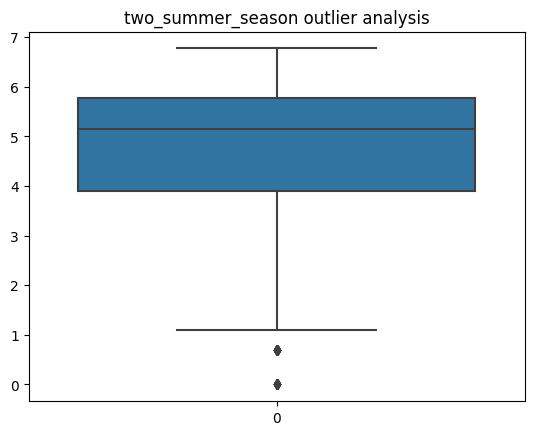

Quratile details
Q1:3.8918202981106265 , Q3:5.771441123130016 , IQR :1.8796208250193893 , right_wisker : 8.5908723606591  , left_wisker :1.0723890605815423


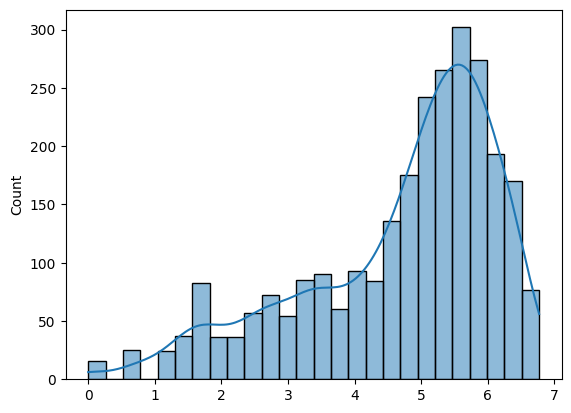

In [15]:
two_summer_season = season_vs_count_data['two_summer_season']
title = 'two_summer_season'
normalized_two_summer_season = plot_all_details(two_summer_season,title)

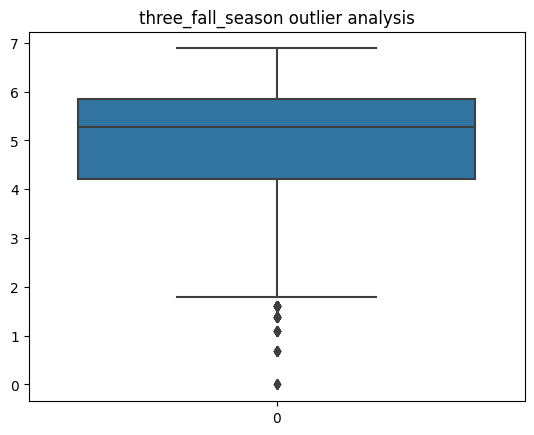

Quratile details
Q1:4.219507705176107 , Q3:5.849324779946859 , IQR :1.6298170747707523 , right_wisker : 8.294050392102989  , left_wisker :1.7747820930199785


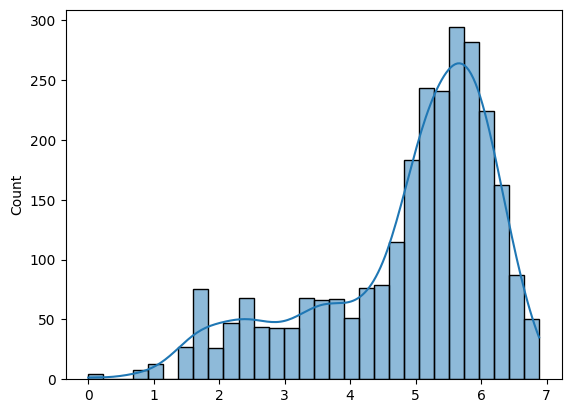

In [16]:
three_fall_season = season_vs_count_data['three_fall_season']
title = 'three_fall_season'
normalized_three_fall_season = plot_all_details(three_fall_season,title)

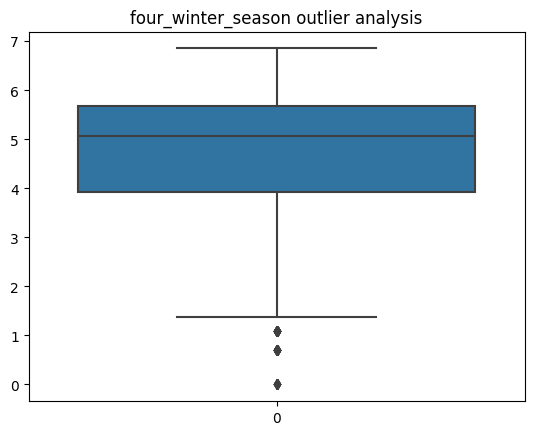

Quratile details
Q1:3.9318256327243257 , Q3:5.682727977758278 , IQR :1.750902345033952 , right_wisker : 8.309081495309206  , left_wisker :1.3054721151733975


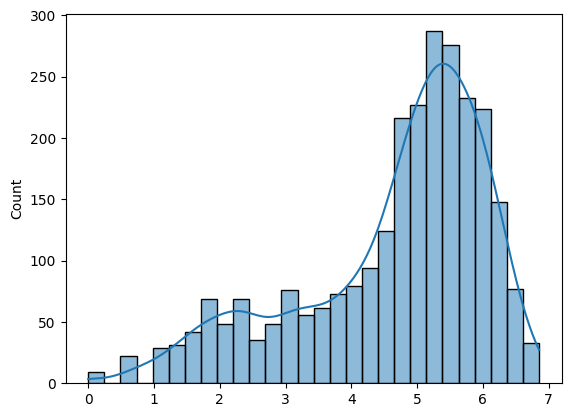

In [17]:
four_winter_season = season_vs_count_data['four_winter_season']
title = 'four_winter_season'
normalized_four_winter_season = plot_all_details(four_winter_season,title)

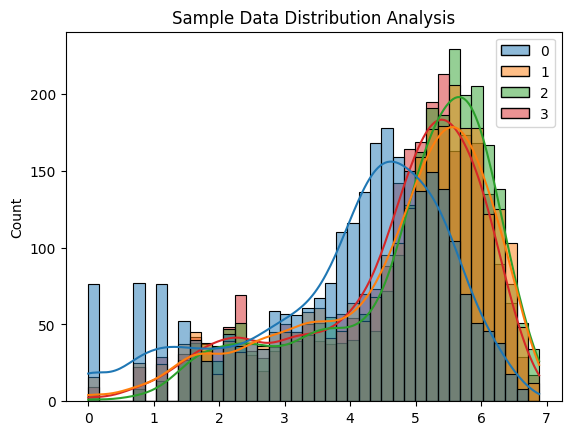


 normalized_one_spring_season_mean:3.98 ,
 normalized_two_summer_season_mean : 4.7 ,
 normalized_three_fall_season_mean : 4.86 , 
 normalized_four_winter_season_mean : 4.65


As We can Observe that Sample population is now following normal distribution so we are good to go with ANOVA Test


In [18]:
plt.title('Sample Data Distribution Analysis')
sns.histplot([normalized_one_spring_season,normalized_two_summer_season,normalized_three_fall_season,normalized_four_winter_season],kde=True)
plt.show()

normalized_one_spring_season_mean = round(np.mean(normalized_one_spring_season),2)
normalized_two_summer_season_mean = round(np.mean(normalized_two_summer_season),2)
normalized_three_fall_season_mean = round(np.mean(normalized_three_fall_season),2)
normalized_four_winter_season_mean = round(np.mean(normalized_four_winter_season),2)

print(f'\n normalized_one_spring_season_mean:{normalized_one_spring_season_mean} ,\n normalized_two_summer_season_mean : {normalized_two_summer_season_mean} ,\n normalized_three_fall_season_mean : {normalized_three_fall_season_mean} , \n normalized_four_winter_season_mean : {normalized_four_winter_season_mean}')
print("\n")

print("As We can Observe that Sample population is now following normal distribution so we are good to go with ANOVA Test")

# ANOVA TEST

# Does Season has significant impact on registration count of users

Alpha = 0.05

H0 : Mean of four population is equal

Ha : Mean of four population is not equal

In [19]:
alpha = 0.05
test_stat , p_value = f_oneway(normalized_one_spring_season,normalized_two_summer_season,normalized_three_fall_season,normalized_four_winter_season)
print(f" test_stat : {test_stat}\n p_value :{p_value} ")
if(p_value <alpha):
    print(" Reject NULL Hypothesis")
else:
    print(" Fail to reject NULL Hypothesis")

 test_stat : 191.42651957739633
 p_value :6.130337301284272e-121 
 Reject NULL Hypothesis


# Observation from ANOVA TEST

1. This test has proven that means of all four population is not same.
2. This test has provided the result that it has significant impact on registration count of users.
3. Hence we can say it has Significant impact on count of registration.


In [20]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Does weather has significant impact on user registeration count

In [21]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [22]:
one_weather = data.loc[data['weather']==1]['count']
two_weather = data.loc[data['weather']==2]['count']
three_weather = data.loc[data['weather']==3]['count']
four_weather = data.loc[data['weather']==4]['count']

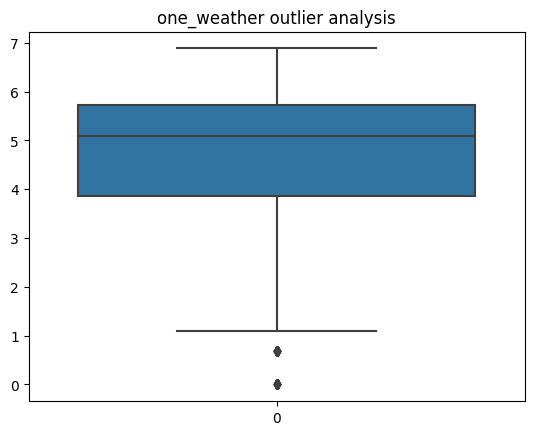

Quratile details
Q1:3.871201010907891 , Q3:5.720311776607412 , IQR :1.8491107656995207 , right_wisker : 8.493977925156692  , left_wisker :1.0975348623586103


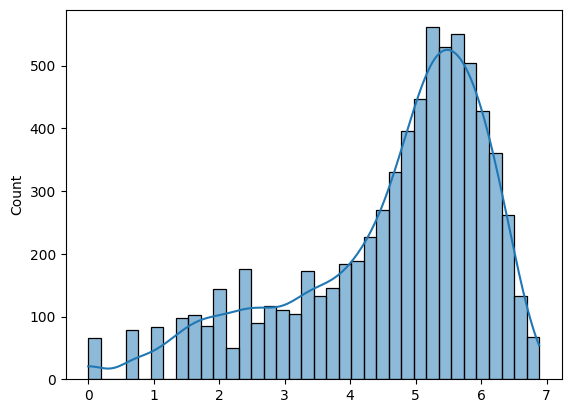

In [23]:
normalized_one_weather_data = plot_all_details(one_weather,'one_weather')

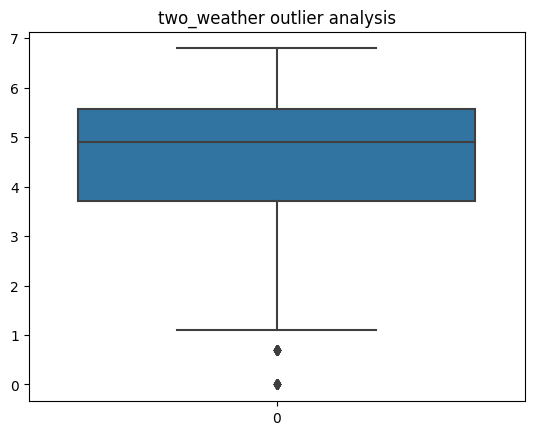

Quratile details
Q1:3.713572066704308 , Q3:5.575949103146316 , IQR :1.862377036442008 , right_wisker : 8.369514657809328  , left_wisker :0.9200065120412959


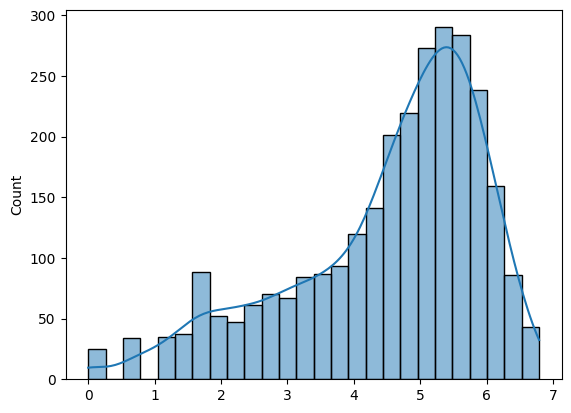

In [24]:
normalized_two_weather_data = plot_all_details(two_weather,'two_weather')

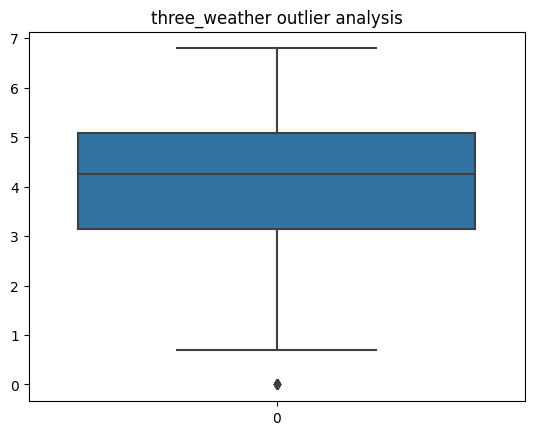

Quratile details
Q1:3.1354942159291497 , Q3:5.081404364984463 , IQR :1.9459101490553135 , right_wisker : 8.000269588567434  , left_wisker :0.2166289923461795


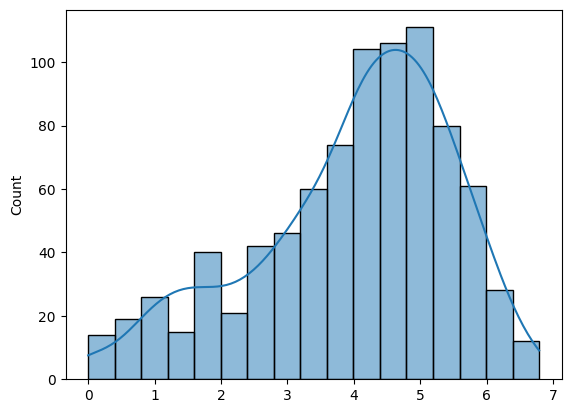

In [25]:
normalized_three_weather_data = plot_all_details(three_weather,'three_weather')

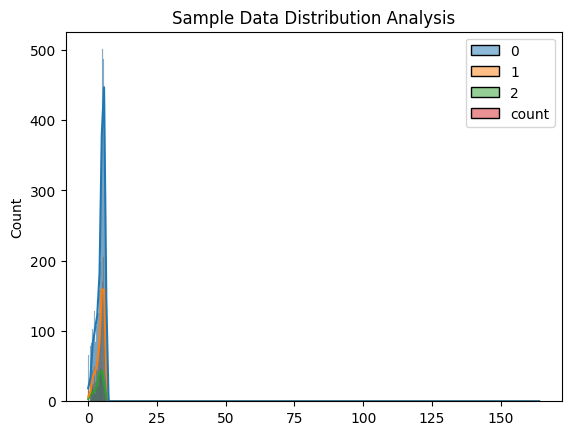


 normalized_one_weather_data_mean:4.64 ,
 normalized_two_weather_data_mean : 4.51 ,
 normalized_three_weather_data_mean : 3.99 , 
 normalized_four_weather_data_mean : 164.0


As We can Observe that Sample population is now following normal distribution so we are good to go with ANOVA Test


In [26]:
#%matplotlib notebook
plt.title('Sample Data Distribution Analysis')
sns.histplot([normalized_one_weather_data,normalized_two_weather_data,normalized_three_weather_data,four_weather],kde=True)
plt.show()

normalized_one_weather_data_mean = round(np.mean(normalized_one_weather_data),2)
normalized_two_weather_data_mean = round(np.mean(normalized_two_weather_data),2)
normalized_three_weather_data_mean = round(np.mean(normalized_three_weather_data),2)
normalized_four_weather_data_mean = round(np.mean(four_weather),2)

print(f'\n normalized_one_weather_data_mean:{normalized_one_weather_data_mean} ,\n normalized_two_weather_data_mean : {normalized_two_weather_data_mean} ,\n normalized_three_weather_data_mean : {normalized_three_weather_data_mean} , \n normalized_four_weather_data_mean : {normalized_four_weather_data_mean}')
print("\n")

print("As We can Observe that Sample population is now following normal distribution so we are good to go with ANOVA Test")

# ANOVA TEST

# Does Weather has significant impact on registration count of users

Alpha = 0.05

H0 : Mean of four weather population is equal

Ha : Mean of four weather population is not equal

In [27]:
alpha = 0.05
test_stat , p_value = f_oneway(normalized_one_weather_data,normalized_two_weather_data,normalized_three_weather_data,four_weather)
print(f" test_stat : {test_stat}\n p_value :{p_value} ")
if(p_value < alpha):
    print(" Reject NULL Hypothesis")
else:
    print(" Fail to reject NULL Hypothesis")

 test_stat : 3923.0472101359965
 p_value :0.0 
 Reject NULL Hypothesis


# Does Holidays have significant impact on count 

In [28]:
data['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

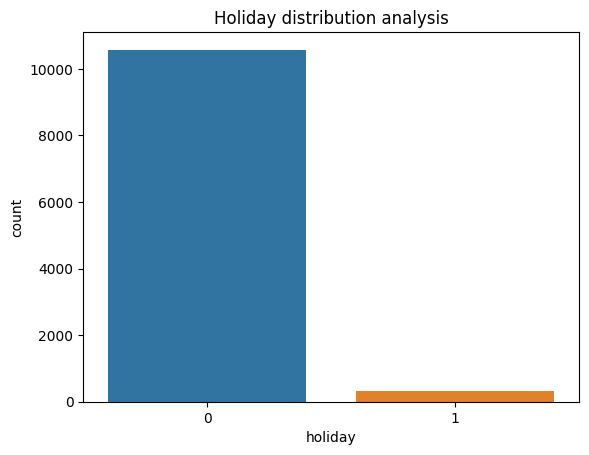

In [29]:
plt.title('Holiday distribution analysis')
sns.countplot(data=data,x='holiday')
plt.show()

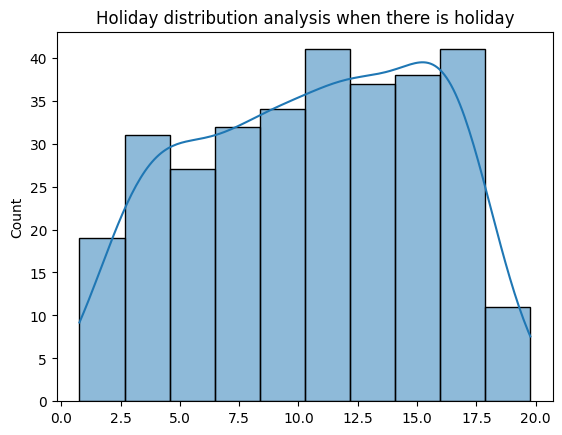

In [30]:
df_holiday_count = data.loc[data['holiday']==1]['count']
df_no_holiday_count = data.loc[data['holiday']==0]['count']

df_holiday_count_target, lam = yeojohnson(df_holiday_count)
#df_holiday_count_target = np.log(df_holiday_count)
plt.title('Holiday distribution analysis when there is holiday')
sns.histplot(df_holiday_count_target,kde=True)
plt.show()

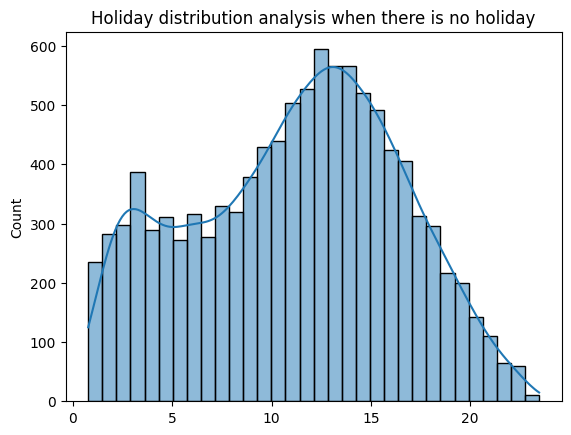

In [31]:
df_no_holiday_count_target , lam = yeojohnson(df_no_holiday_count)
#df_no_holiday_count_target = np.log(df_no_holiday_count)
plt.title('Holiday distribution analysis when there is no holiday')
sns.histplot(df_no_holiday_count_target,kde=True)
plt.show()

# 2 Sample t-test

Alpha = 0.05

m1 -> Mean of sample when there is holiday

m2 -> Mean of sample when there is no holiday

H0 : m1=m2

Ha : m1!=m2

In [32]:
alpha = 0.05
test_stat,p_value = ttest_ind(df_no_holiday_count_target,df_holiday_count_target)
print(f"test_stat :{test_stat} , p-value : {p_value}")
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

test_stat :1.9977136223208825 , p-value : 0.0457725601102735
Reject Null Hypothesis


# Conclusion
This test concludes that holidays has a significant effect on registration count of users.

# Does workingday have a significant effect on count

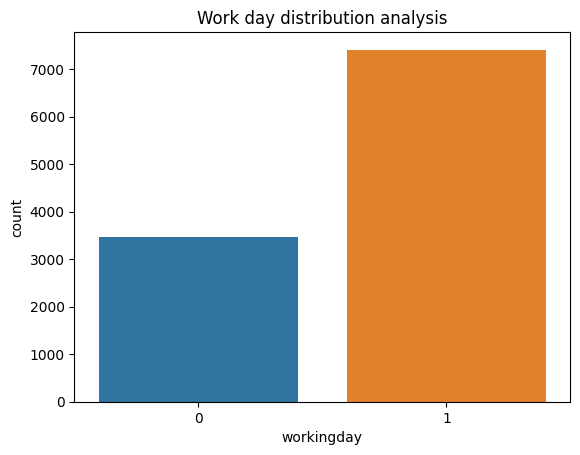

working day distribution


1    7412
0    3474
Name: workingday, dtype: int64

In [33]:
plt.title('Work day distribution analysis')
sns.countplot(data=data,x='workingday')
plt.show()
print("working day distribution")
data['workingday'].value_counts()

In [34]:
df_user_on_work = data.loc[data['workingday']==1]['count']
df_user_on_nowork = data.loc[data['workingday']==0]['count']

In [35]:
df_workday = pd.DataFrame(zip(df_user_on_work,df_user_on_nowork),columns =['Work','NoWork'])

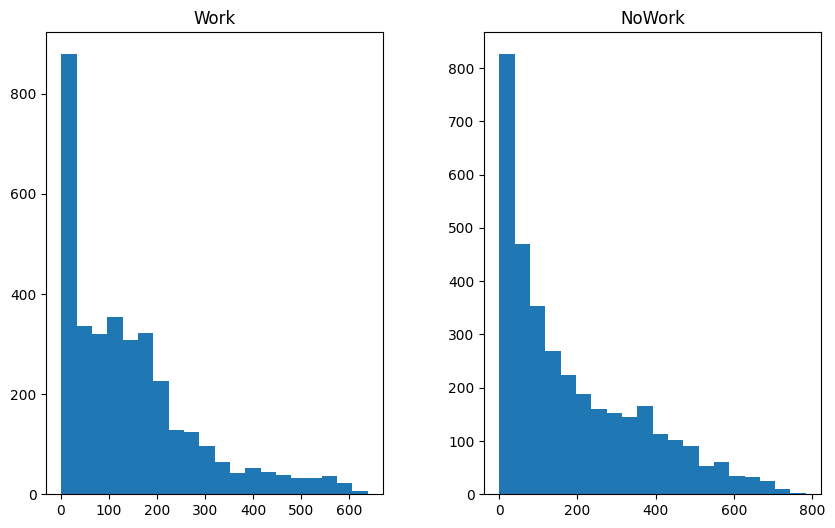

In [36]:
df_workday.hist(grid=False,
       figsize=(10, 6),
       bins=20)
plt.show()

In [37]:
df_workday.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Work,1.263759,1.291764
NoWork,0.964038,0.036377


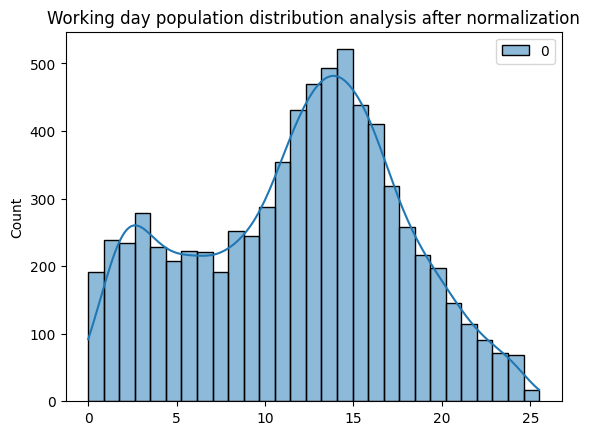

In [38]:
plt.title("Working day population distribution analysis after normalization")
normalized_df_user_on_work,lam = boxcox(df_user_on_work)
sns.histplot([normalized_df_user_on_work],kde=True)
plt.show()

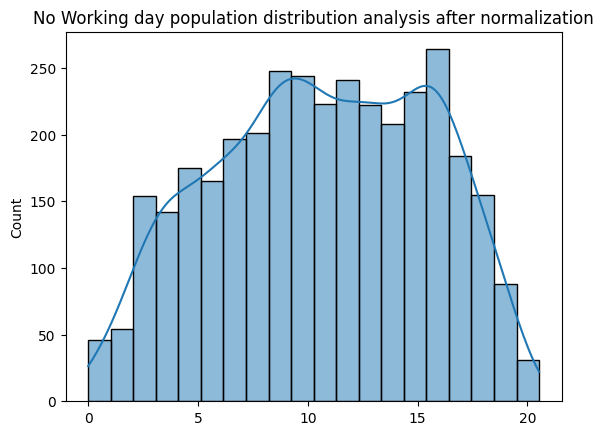

In [39]:
plt.title("No Working day population distribution analysis after normalization")
normalized_df_user_on_nowork,lam =  boxcox(df_user_on_nowork)
sns.histplot(normalized_df_user_on_nowork,kde=True)
plt.show()

# Two Sample T-test

# Does workingday have a significant effect on registration count of users

alpha = 0.05

M1 - > Mean of user registration on workingday.

M2 - > Mean of user registration on non workingday.

H0 : M1=M2

Ha : M1!=M2

In [40]:
alpha = 0.05
test_stat,p_value = ttest_ind(normalized_df_user_on_work,normalized_df_user_on_nowork)
print(f"test_stat :{test_stat} , p-value : {p_value}")
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

test_stat :9.700433069624191 , p-value : 3.690834732852787e-22
Reject Null Hypothesis


# Conclusion
This test concludes that working day has significant effect on registration count of users.

Hence working day has a significant impact on registration count of users.

# Does Weather is dependent on the season

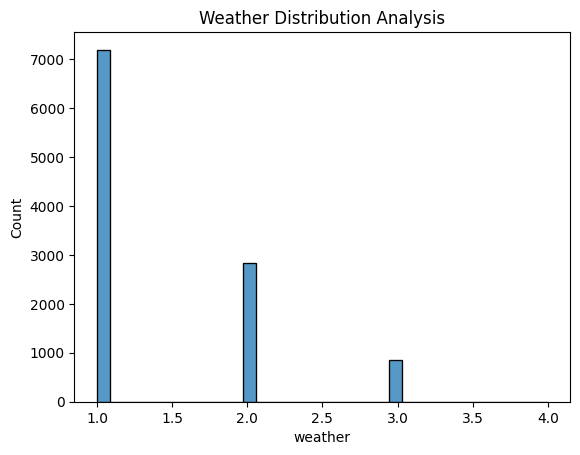

In [41]:
plt.title("Weather Distribution Analysis")
sns.histplot(data['weather'])
plt.show()

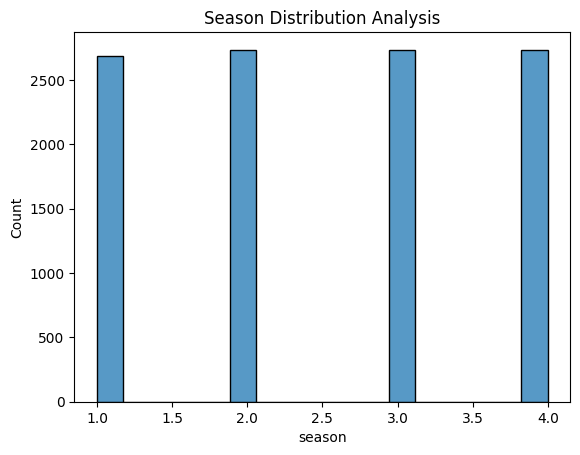

In [42]:
plt.title("Season Distribution Analysis")
sns.histplot(data['season'])
plt.show()

# Creating Cross Tablulation between categorical variables

In [43]:
weather_vs_season = pd.crosstab(data['weather'],data['season'])
weather_vs_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


# Chi-square Test

# Does Weather have a significant dependency on season count of users

alpha = 0.05

H0 : Weather and season are independent on each other.

Ha : Weather and season are dependent on each other.

In [44]:
test_stat , p_value , dof , expect_arr = chi2_contingency(weather_vs_season)
print(f"test_stat :{test_stat} , p-value : {p_value}")
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

test_stat :49.15865559689363 , p-value : 1.5499250736864862e-07
Reject Null Hypothesis


# Conclusion
Hence we can say that Weather has a significant dependency on season.

# Does Temperature has significant impact on user registeration count

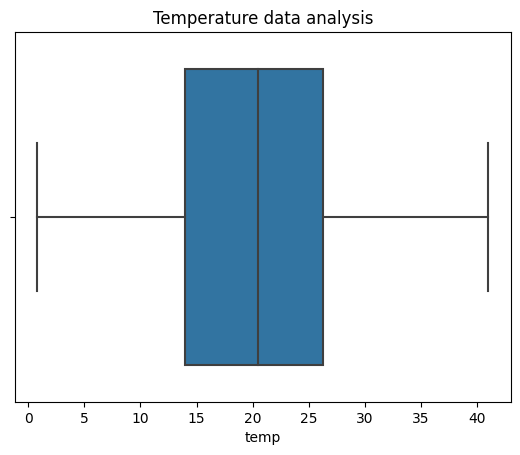

In [45]:
plt.title('Temperature data analysis')
sns.boxplot(data = data , x='temp')
plt.show()

In [46]:
Q1,Q2,Q3 = np.percentile(data['temp'],[25,50,75])
IQR = Q3-Q1
right = Q3 + (1.5 * IQR)
left =  Q1 - (1.5 * IQR)
print('Quratile details')
print (f'Q1 : {Q1} , Q2 : {Q2} ,Q3 : {Q3} ,IQR : {IQR}, right : {right}, left : {left}')

Quratile details
Q1 : 13.94 , Q2 : 20.5 ,Q3 : 26.24 ,IQR : 12.299999999999999, right : 44.69, left : -4.51


In [47]:
labels = ['low','medium','high']
bins = [left,Q1,Q3,right]
data['temp_bins'] = pd.cut(data['temp'],bins=bins,labels=labels)

In [48]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_bins
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,low
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,low
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,low
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,low
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,low


In [49]:
data['temp_bins'].value_counts()

medium    5318
low       2926
high      2642
Name: temp_bins, dtype: int64

In [50]:
count_when_temp_low = data.loc[data['temp_bins']=='low']['count']
count_when_temp_medium = data.loc[data['temp_bins']=='medium']['count']
count_when_temp_high = data.loc[data['temp_bins']=='high']['count']


count_when_temp_low_normalized = np.log(count_when_temp_low)
count_when_temp_medium_normalized = np.log(count_when_temp_medium)
count_when_temp_high_normalized = np.log(count_when_temp_high)

In [51]:
print(f'low_temp_mean:{count_when_temp_low_normalized.mean()} \nmedium_temp_mean:{count_when_temp_medium_normalized.mean()} \nhigh_temp_mean:{count_when_temp_high_normalized.mean()}')

low_temp_mean:3.83234022140282 
medium_temp_mean:4.610784905911001 
high_temp_mean:5.233004717883454


# Population Distribution Analysis

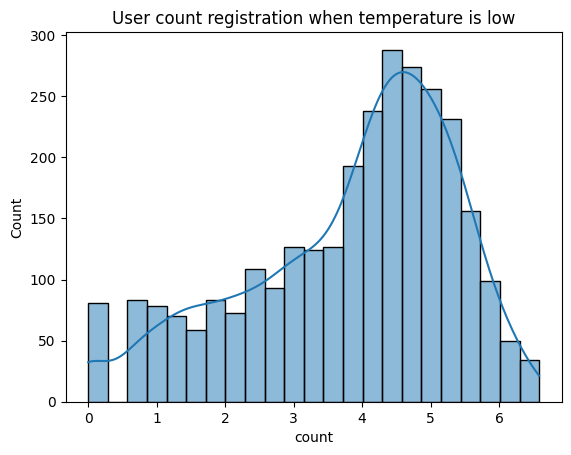

In [52]:
plt.title('User count registration when temperature is low')
sns.histplot(np.log(count_when_temp_low),kde=True)
plt.show()

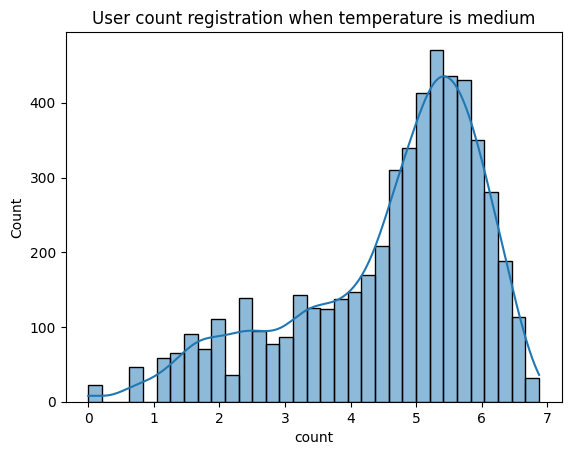

In [53]:
plt.title('User count registration when temperature is medium')
sns.histplot(np.log(count_when_temp_medium),kde=True)
plt.show()

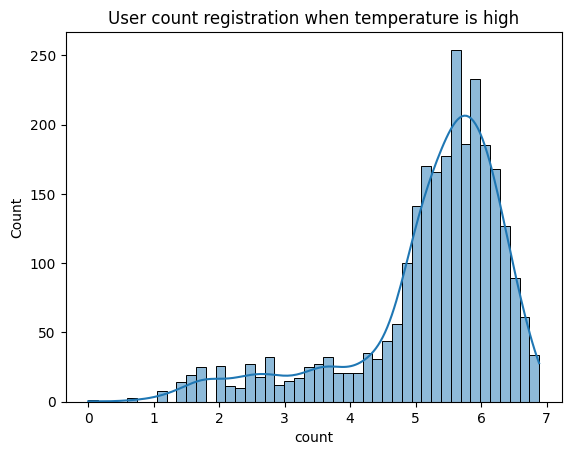

In [54]:
plt.title('User count registration when temperature is high')
sns.histplot(np.log(count_when_temp_high),kde=True)
plt.show()

# ANOVA TEST

# Does Temperature has significant impact on user registeration count

Alpha = 0.05

H0 : Mean of temp population is equal

Ha : Mean of temp population is not equal

In [55]:
alpha = 0.05
test_stat , p_value = f_oneway(count_when_temp_low_normalized,count_when_temp_medium_normalized,count_when_temp_high_normalized)
print(f" test_stat : {test_stat}\n p_value :{p_value} ")
if(p_value <alpha):
    print(" Reject NULL Hypothesis")
else:
    print(" Fail to reject NULL Hypothesis")

 test_stat : 702.3576332880464
 p_value :1.289619056195927e-287 
 Reject NULL Hypothesis


# Conclusion
Hence we can say that temperature does have a significant impact on user registeration count

In [56]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_bins
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,low
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,low
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,low
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,low
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,low
